In [12]:
import pandas as pd

csv = ('filtered_file.csv')
data = pd.read_csv(csv)

data.head()



,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,9.597097,0.0,0.0,0.0,29,29.2169,0,0.0,0.0,0.0,...,KMX,NaN,0.0,NaN,Tue Jan 07 00:00:00 EST 2020,Tue Apr 14 00:00:00 EDT 2020,Y,0,0,0
1,11.018889,0.0,0.0,0.0,25,25.0648,0,0.0,0.0,0.0,...,KMX,NaN,0.0,NaN,Tue Jan 07 00:00:00 EST 2020,Tue Mar 24 00:00:00 EDT 2020,Y,0,0,0
2,10.258966,0.0,0.0,0.0,27,26.8552,0,0.0,0.0,0.0,...,KMX,NaN,0.0,NaN,Tue Jan 07 00:00:00 EST 2020,Tue Mar 24 00:00:00 EDT 2020,Y,0,0,0
3,13.523182,0.0,0.0,0.0,19,19.0003,0,0.0,0.0,0.0,...,JLX,NaN,0.0,NaN,Tue Feb 25 00:00:00 EST 2020,Tue May 05 00:00:00 EDT 2020,Y,0,0,0
4,13.523182,0.0,0.0,0.0,19,19.0003,0,0.0,0.0,0.0,...,JLX,NaN,0.0,NaN,Tue Feb 25 00:00:00 EST 2020,Tue May 05 00:00:00 EDT 2020,Y,0,0,0


In [37]:
toyota_data = data[data['make'] == 'Toyota']
kia_data = data[data['make'] == 'Kia']
toyota_data.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
55,11.900400,0.0,0.0,0.0,22,22.1809,0,0.0,0.0,0.0,...,BMX,NaN,0.0,NaN,Tue Apr 14 00:00:00 EDT 2020,Tue Oct 26 00:00:00 EDT 2021,Y,0,0,0
65,9.015455,0.0,0.0,0.0,30,29.7701,0,0.0,0.0,0.0,...,TYX,NaN,0.0,NaN,Fri Apr 24 00:00:00 EDT 2020,Mon Aug 24 00:00:00 EDT 2020,N,0,0,0
66,9.015455,0.0,0.0,0.0,29,29.0860,0,0.0,0.0,0.0,...,TYX,NaN,0.0,NaN,Fri Apr 24 00:00:00 EDT 2020,Mon Aug 24 00:00:00 EDT 2020,N,0,0,0
67,9.297187,0.0,0.0,0.0,29,28.8851,0,0.0,0.0,0.0,...,TYX,NaN,0.0,NaN,Fri Apr 24 00:00:00 EDT 2020,Mon Aug 24 00:00:00 EDT 2020,N,0,0,0
68,5.721346,0.0,0.0,0.0,53,53.0000,0,0.0,0.0,0.0,...,TYX,NaN,0.0,NaN,Fri Apr 24 00:00:00 EDT 2020,Mon Jul 27 00:00:00 EDT 2020,Y,0,0,0


In [44]:
avg_fe_score = data['feScore'].groupby(data['year']).mean()
avg_fe_score.head()

year
2021    4.747278
2022    5.063588
2023    5.210526
2024    5.577229
2025    5.558750
Name: feScore, dtype: float64

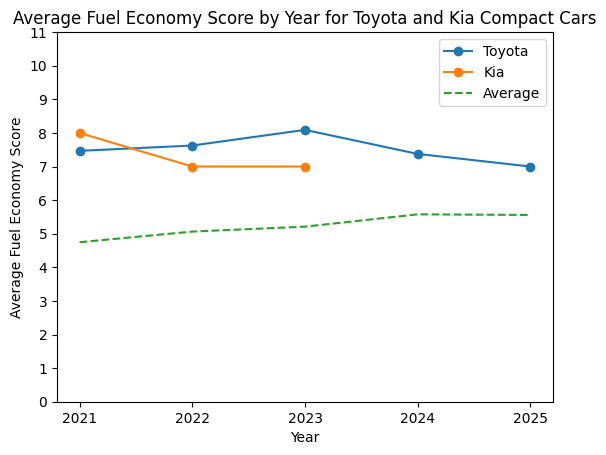

58


In [48]:
compact_cars = toyota_data[toyota_data['VClass'] == 'Compact Cars']
compact_cars = compact_cars[['make', 'VClass', 'year', 'feScore', 'model']]
final_table_toyota_compact_cars = compact_cars.groupby('year').agg({'feScore': 'mean'})


compact_kia = kia_data[kia_data['VClass'] == 'Compact Cars']
compact_kia = compact_kia[['make', 'VClass', 'year', 'feScore', 'model']]
final_table_kia_compact_cars = compact_kia.groupby('year').agg({'feScore': 'mean'})


import matplotlib.pyplot as plt

plt.plot(final_table_toyota_compact_cars.index, final_table_toyota_compact_cars['feScore'], marker='o', linestyle='-', label='Toyota')
plt.plot(final_table_kia_compact_cars.index, final_table_kia_compact_cars['feScore'], marker='o', linestyle='-', label='Kia')
plt.plot(avg_fe_score.index, avg_fe_score, linestyle='--', label='Average')
# plt.axhline(y=avg_fe_score, color='r', linestyle='--', label='Average Fuel Economy Score')
plt.title('Average Fuel Economy Score by Year for Toyota and Kia Compact Cars')
plt.xlabel('Year')
plt.ylabel('Average Fuel Economy Score')
plt.xticks(ticks=range(2021, 2026), labels=range(2021, 2026))
plt.yticks(ticks=range(0, 12))
plt.legend()
plt.show()

print(len(compact_cars))

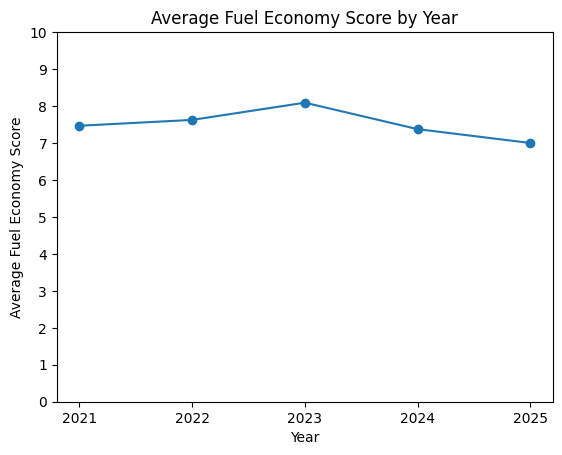

In [35]:
compact_cars.sort_values(by='year')

final_table = compact_cars.groupby('year').agg({'feScore': 'mean'})
final_table

import matplotlib.pyplot as plt
final_table.plot(marker='o', linestyle='-', legend=False)
plt.title('Average Fuel Economy Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Fuel Economy Score')
plt.xticks(ticks=final_table.index, labels=final_table.index.astype(int))
plt.yticks(ticks=range(0, 11))
plt.show()